**Vehicle Detection Project**

The goals / steps of this project are the following:

* Perform a Histogram of Oriented Gradients (HOG) feature extraction on a labeled training set of images and train a classifier Linear SVM classifier
* Optionally, you can also apply a color transform and append binned color features, as well as histograms of color, to your HOG feature vector. 
* Note: for those first two steps don't forget to normalize your features and randomize a selection for training and testing.
* Implement a sliding-window technique and use your trained classifier to search for vehicles in images.
* Run your pipeline on a video stream (start with the test_video.mp4 and later implement on full project_video.mp4) and create a heat map of recurring detections frame by frame to reject outliers and follow detected vehicles.
* Estimate a bounding box for vehicles detected.

## [Rubric](https://review.udacity.com/#!/rubrics/513/view) Points
### Here I will consider the rubric points individually and describe how I addressed each point in my implementation. 
---
### Writeup / README

#### 1. Provide a Writeup / README that includes all the rubric points and how you addressed each one.  You can submit your writeup as markdown or pdf.  [Here](https://github.com/udacity/CarND-Vehicle-Detection/blob/master/writeup_template.md) is a template writeup for this project you can use as a guide and a starting point.  

You're reading it!

### Histogram of Oriented Gradients (HOG)

#### 1. Explain how (and identify where in your code) you extracted HOG features from the training images.

The code for this step is contained in the `Feature Extraction` section of the IPython notebook. `get_hog_features` function computes HOG features for the images.

I started by reading in all the `vehicle` and `non-vehicle` images.  Here is an example of one of each of the `vehicle` and `non-vehicle` classes:

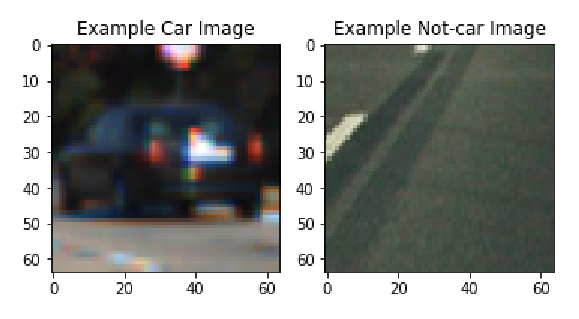

In [19]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
img = mpimg.imread('output_images/image1.png')
fig,ax = plt.subplots(1, figsize=(10,10))
ax.imshow(img)
# Turn off tick labels
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.axis('off')
plt.show()

I then explored different color spaces and different `skimage.hog()` parameters (`orientations`, `pixels_per_cell`, and `cells_per_block`).  I grabbed random images from each of the two classes and displayed them to get a feel for what the `skimage.hog()` output looks like.

Here is an example using the `YCrCb` color space and HOG parameters of `orientations=9`, `pixels_per_cell=(8, 8)` and `cells_per_block=(2, 2)`:

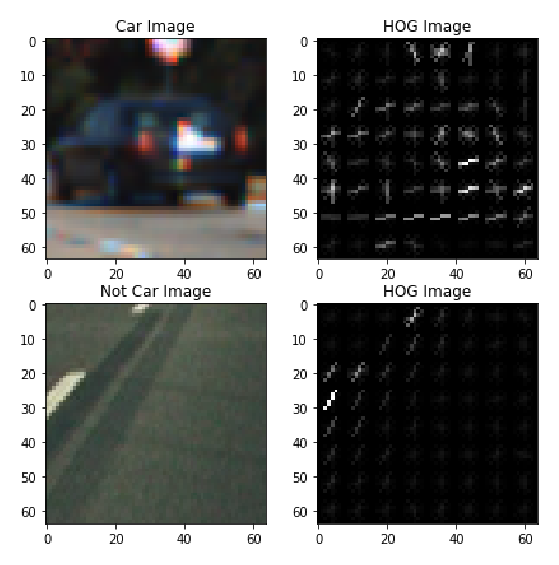

In [20]:
img = mpimg.imread('output_images/image2.png')
fig,ax = plt.subplots(1, figsize=(10,10))
ax.imshow(img)
# Turn off tick labels
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.axis('off')
plt.show()

#### 2. Explain how you settled on your final choice of HOG parameters.

I experimented with a number of different combinations of color spaces and HOG parameters and trained a linear SVM using different combinations of HOG features extracted from the color channels.
RGB colorspace wasn't useful because of various light conditions on images. YCrCb, YUV colorspaces performed better in terms of accuracy. 
`orient=9`, `orient=11` and `orient=17` produced similar results, so ended up using `orient=9` for short feature vector.
`cells_per_block=2` and `pixels_per_cell=8` produced acceptable results unlike other values.

#### 3. Describe how (and identify where in your code) you trained a classifier using your selected HOG features (and color features if you used them).
The code for this step is contained in the `Extract and Combine features`, `Normalize features`, `Training`, `Testing` sections of the IPython notebook. 

linear SVM is used to train the model using HOG, spatial and color histogram features (functions defined in `Feature Extraction` section).

Acheived test accuracy of 0.9994

### Sliding Window Search

#### 1. Describe how (and identify where in your code) you implemented a sliding window search.  How did you decide what scales to search and how much to overlap windows?
The code for this step is contained in the `Multi-Scale Windows` section of the IPython notebook. I used various scales and regions for sliding window search. Images below show sliding window region for each `(y_start, y_stop, scale)` tuple. Window size is also highlighted in the bottom right.

All windows are combined in the last image for visualization.

window overlap of 75% produces results with less false negatives (50% is the other value tried).

scales of 1, 1.5, 2, 2.5, 3, 3.5 are explored to find 3, 3.5 not adding enough value in detecting cars.

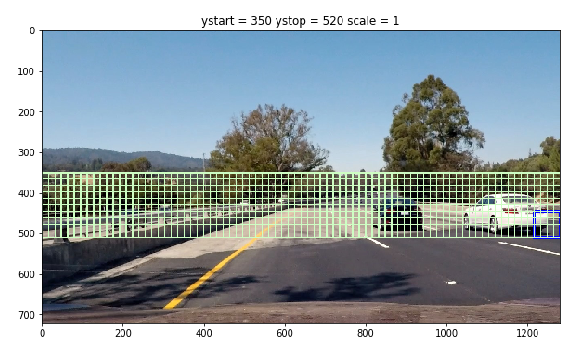

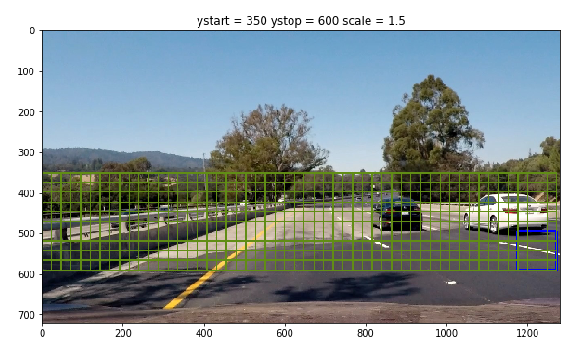

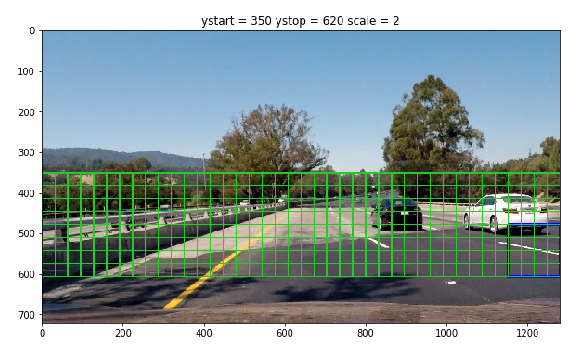

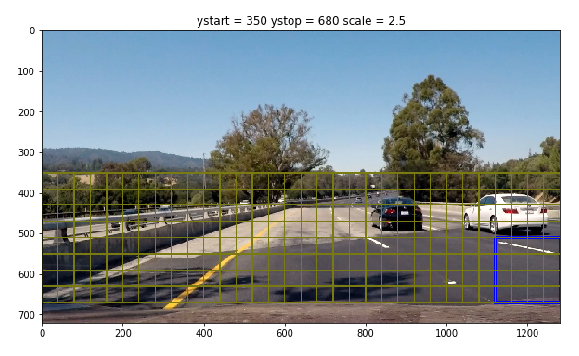

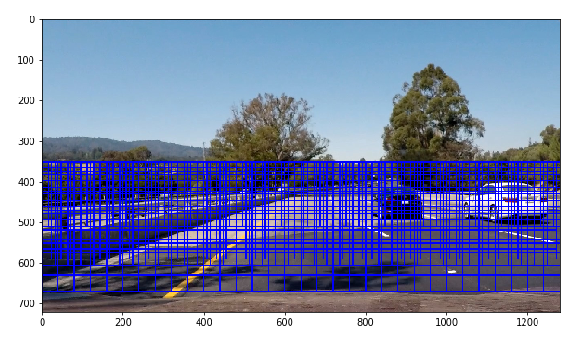

In [24]:
img = mpimg.imread('output_images/image3.png')
fig,ax = plt.subplots(1, figsize=(10,10))
ax.imshow(img)
# Turn off tick labels
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.axis('off')
plt.show()
img = mpimg.imread('output_images/image4.png')
fig,ax = plt.subplots(1, figsize=(10,10))
ax.imshow(img)
# Turn off tick labels
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.axis('off')
plt.show()
img = mpimg.imread('output_images/image5.png')
fig,ax = plt.subplots(1, figsize=(10,10))
ax.imshow(img)
# Turn off tick labels
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.axis('off')
plt.show()
img = mpimg.imread('output_images/image6.png')
fig,ax = plt.subplots(1, figsize=(10,10))
ax.imshow(img)
# Turn off tick labels
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.axis('off')
plt.show()
img = mpimg.imread('output_images/image7.png')
fig,ax = plt.subplots(1, figsize=(10,10))
ax.imshow(img)
# Turn off tick labels
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.axis('off')
plt.show()

#### 2. Show some examples of test images to demonstrate how your pipeline is working.  What did you do to optimize the performance of your classifier?
Ultimately I searched on two scales using YCrCb 3-channel HOG features plus spatially binned color and histograms of color in the feature vector, which provided a nice result. Here are some example images:

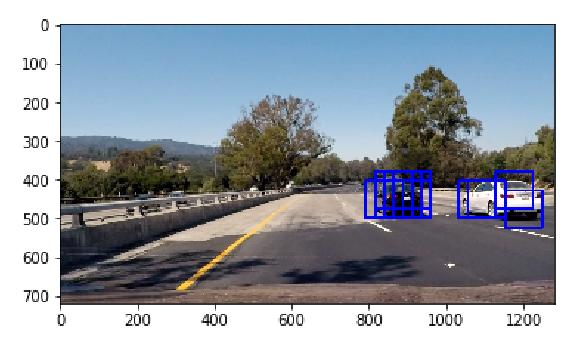

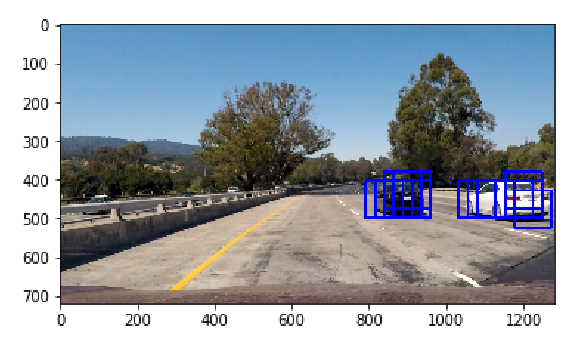

In [25]:
img = mpimg.imread('output_images/image8.png')
fig,ax = plt.subplots(1, figsize=(10,10))
ax.imshow(img)
# Turn off tick labels
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.axis('off')
plt.show()
img = mpimg.imread('output_images/image9.png')
fig,ax = plt.subplots(1, figsize=(10,10))
ax.imshow(img)
# Turn off tick labels
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.axis('off')
plt.show()

#### 1. Provide a link to your final video output.  Your pipeline should perform reasonably well on the entire project video (somewhat wobbly or unstable bounding boxes are ok as long as you are identifying the vehicles most of the time with minimal false positives.)
https://youtu.be/UHIpwPkdL3E

#### 2. Describe how (and identify where in your code) you implemented some kind of filter for false positives and some method for combining overlapping bounding boxes.
I recorded the positions of positive detections in each frame of the video.  From the positive detections I created a heatmap and then thresholded that map to identify vehicle positions.  I then used `scipy.ndimage.measurements.label()` to identify individual blobs in the heatmap.  I then assumed each blob corresponded to a vehicle.  I constructed bounding boxes to cover the area of each blob detected.  

Here's an example result showing the heatmap from a series of frames of video, the result of `scipy.ndimage.measurements.label()` and the bounding boxes then overlaid on the last frame of video:

### Here are six frames and their corresponding heatmaps:

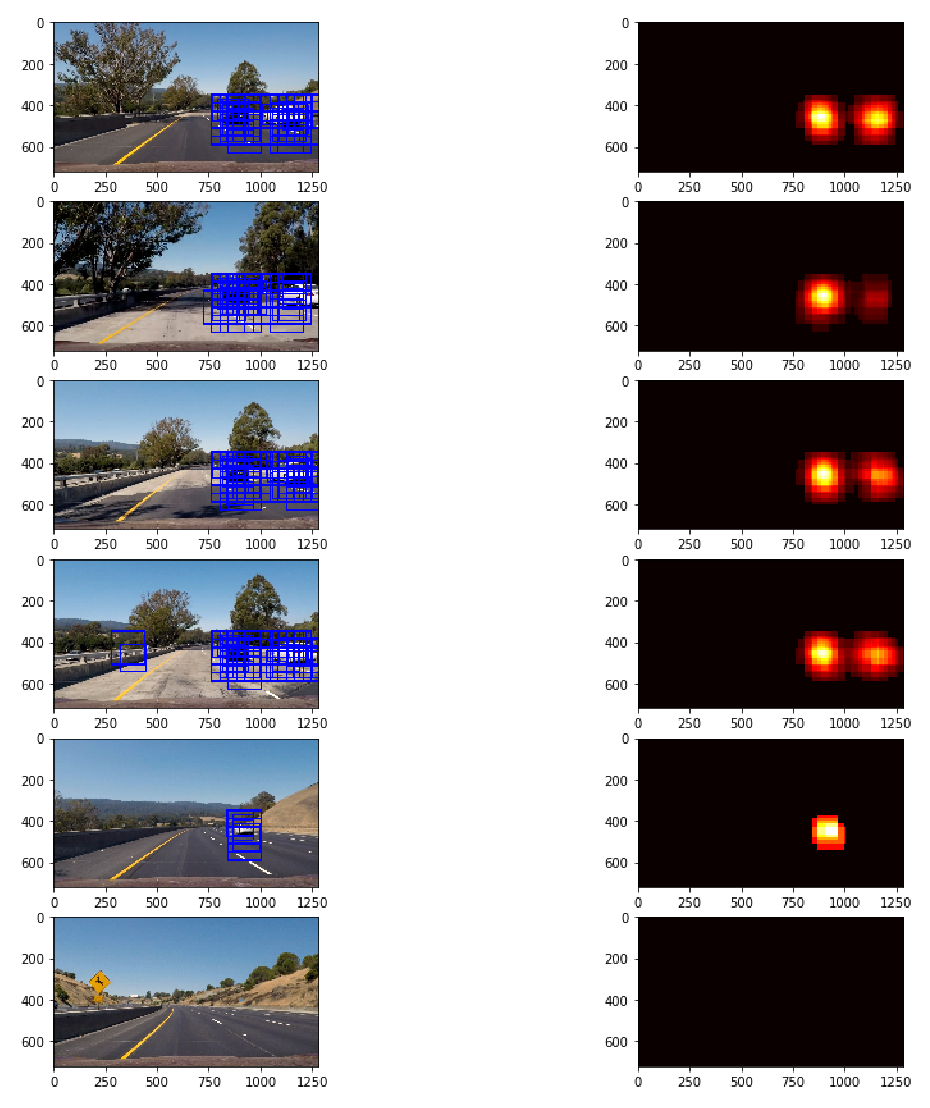

In [28]:
img = mpimg.imread('output_images/image10.png')
fig,ax = plt.subplots(1, figsize=(20,20))
ax.imshow(img)
# Turn off tick labels
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.axis('off')
plt.show()

### Here is the output of `scipy.ndimage.measurements.label()` on the integrated heatmap from all six frames:

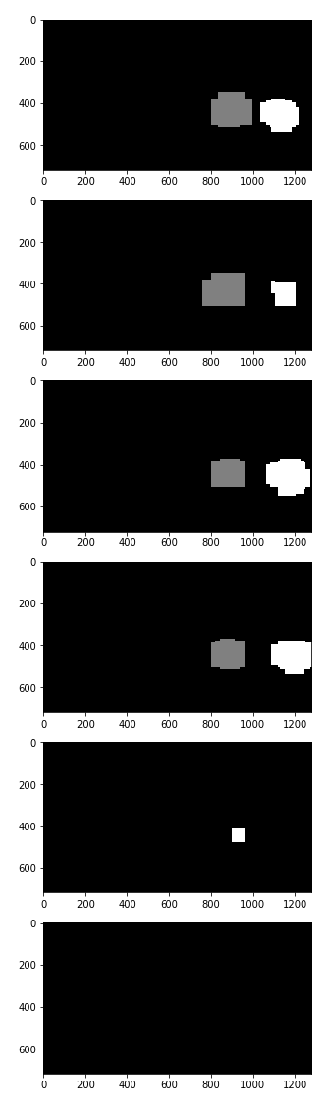

In [29]:
img = mpimg.imread('output_images/image11.png')
fig,ax = plt.subplots(1, figsize=(20,20))
ax.imshow(img)
# Turn off tick labels
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.axis('off')
plt.show()

### Here the resulting bounding boxes are drawn onto the last frame in the series:

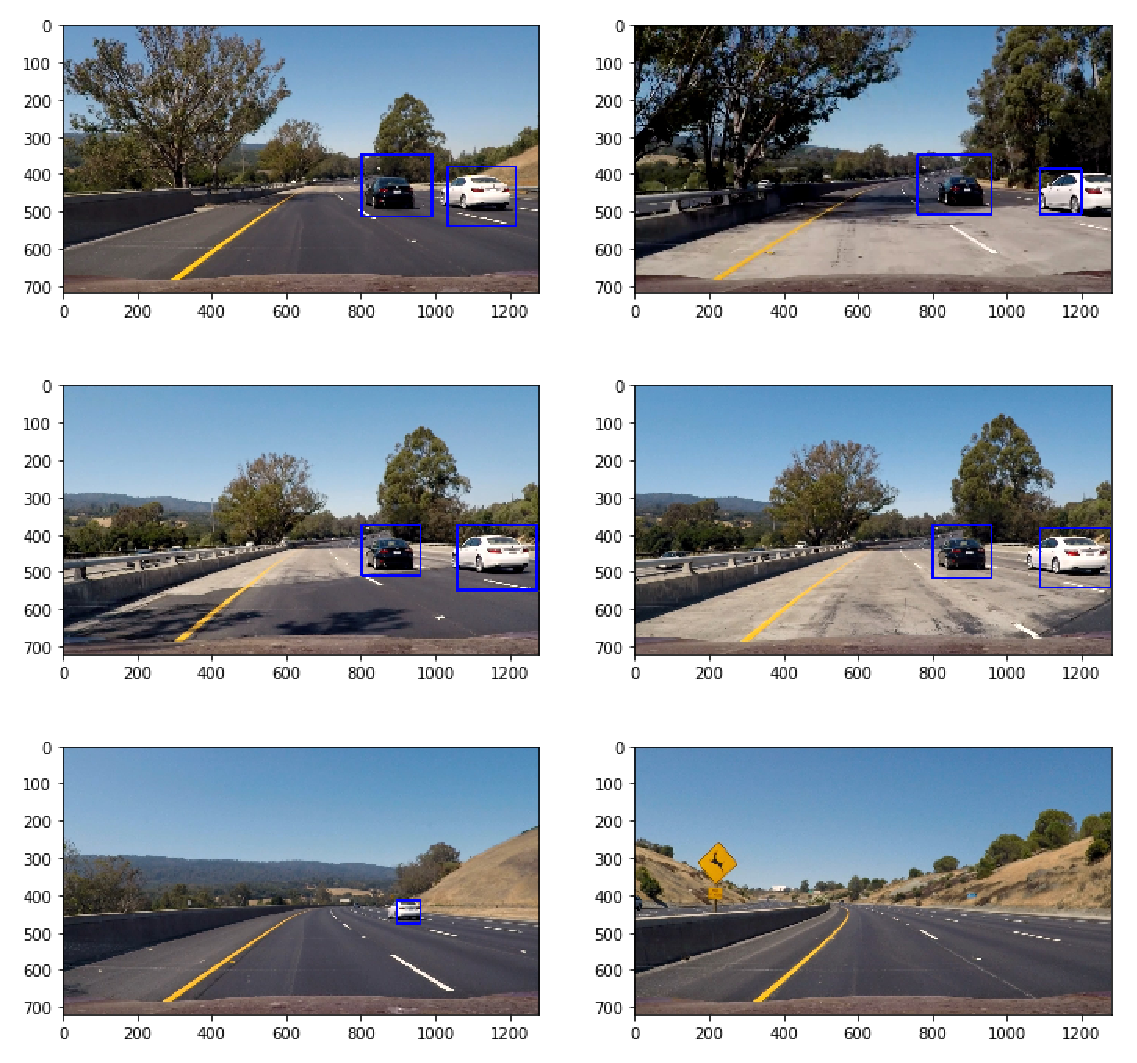

In [30]:
img = mpimg.imread('output_images/image12.png')
fig,ax = plt.subplots(1, figsize=(20,20))
ax.imshow(img)
# Turn off tick labels
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.axis('off')
plt.show()

---

### Discussion

#### 1. Briefly discuss any problems / issues you faced in your implementation of this project.  Where will your pipeline likely fail?  What could you do to make it more robust?

Issues (current + potential):
    1. False positives exist in the some of frames in the video (i.e., we displayed bounding box in the frame when there is no vehicle at that position.
    2. Bounding box computed doesn't fit the vehicle completely.
    3. False negatives exist in some frames (i.e., we couldn't find vehicle or didn't display bounding box around the the vehicle).
    4. Bounding box dimentions changes abruptly b/n consecutive frames.
    5. Single bounding box is displayed when two or more vehicles are closer to each other.
    
Potential solutions:
    1. More training data and/or better learning algorithm (i.e., non-linear SVM) can be used to decrease false positives and false negatives.
    2. Better sliding window sizes can be found to fit vehicles correctly.
    3. Bounding box regions computed in previous frames can be used to restrict the sliding window region for finding new bounding boxes for existing vehicles in the frame (for smooth detection of vehicles).
    4. Adaptive thresholding method can be used when two or more vehicles are moving together on road.